In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
df=pd.read_csv('covid_19_data.csv')

In [5]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
281482,281483,04/27/2021,Zaporizhia Oblast,Ukraine,2021-04-28 04:20:32,94375.0,1854.0,75409.0
281483,281484,04/27/2021,Zeeland,Netherlands,2021-04-28 04:20:32,25243.0,233.0,0.0
281484,281485,04/27/2021,Zhejiang,Mainland China,2021-04-28 04:20:32,1332.0,1.0,1320.0
281485,281486,04/27/2021,Zhytomyr Oblast,Ukraine,2021-04-28 04:20:32,83314.0,1565.0,65414.0
281486,281487,04/27/2021,Zuid-Holland,Netherlands,2021-04-28 04:20:32,350731.0,4119.0,0.0


In [7]:
df.drop('SNo',axis=1,inplace=True)

In [8]:
df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [9]:
df.drop('Last Update',axis=1,inplace=True)

In [10]:
df.rename(columns={'Country/Region':'Country','ObservationDate':'Date'},inplace=True)

In [11]:
df.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [12]:
df['Country']=df['Country'].replace(['Mainland China'],'China')

<AxesSubplot:>

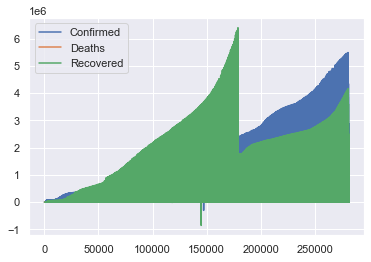

In [13]:
df.plot()

In [14]:
country_grouped=df.groupby(['Country','Date']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

country_grouped["Death_Percent"] = country_grouped["Deaths"] / country_grouped["Confirmed"] * 100 
country_grouped["Recovered_Percent"] = country_grouped["Recovered"] / country_grouped["Confirmed"] * 100

# get total sum of each country
total_sum_country = country_grouped.groupby(['Country']).tail(1)
total_sum_country.tail(20)

,,Confirmed,Recovered,Deaths,Death_Percent,Recovered_Percent
Country,Date,,,,,
Togo,12/31/2020,3633.0,3393.0,68.0,1.871731,93.393889
Trinidad and Tobago,12/31/2020,7150.0,6650.0,127.0,1.776224,93.006993
Tunisia,12/31/2020,139140.0,105364.0,4676.0,3.360644,75.725169
Turkey,12/31/2020,2208652.0,2100650.0,20881.0,0.945418,95.110049
UK,12/31/2020,2496235.0,5482.0,73622.0,2.949322,0.219611
US,12/31/2020,20099363.0,0.0,352085.0,1.751722,0.000000
Uganda,12/31/2020,35216.0,11733.0,251.0,0.712744,33.317242
Ukraine,12/31/2020,1086997.0,736611.0,19281.0,1.773786,67.765688
United Arab Emirates,12/31/2020,207822.0,184442.0,669.0,0.321910,88.749988


In [49]:
total_sum_country = total_sum_country.reset_index()
top_10_confirmed_country = total_sum_country.sort_values(by=['Confirmed'],ascending=False).head(10)

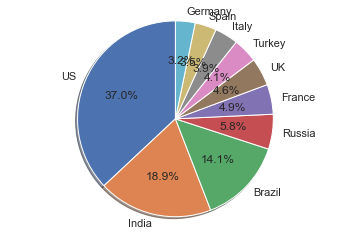

In [50]:
fig1, ax1 = plt.subplots()
ax1.pie(top_10_confirmed_country['Confirmed'], labels=top_10_confirmed_country['Country'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [13]:
global_cases = df.reset_index()
confirmed_df = global_cases[['Date', 'Confirmed']]
recovered_df = global_cases[['Date', 'Recovered']]
deaths_df = global_cases[['Date', 'Deaths']]

In [14]:
def rename_func(df):
    cols = df.columns
    df.rename(columns= {cols[0]: 'ds', cols[1]:'y'}, inplace= True)
    return df

In [15]:
confirmed_df = rename_func(confirmed_df)
recovered_df = rename_func(recovered_df)
deaths_df = rename_func(deaths_df)

C:\Users\91944\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [16]:
def train_test_split(df, ratio):
    """
    Parameters:
    dataframe- Dataframe required to be split
    ratio: Percentage of training split in the scale of 0-100
    """
    divisor = round((ratio/100)*df.shape[0])
    print(divisor)
    train = df.iloc[:divisor]
    test = df.iloc[divisor:]
    return train, test

In [17]:
confirmed_train, confirmed_test = train_test_split(confirmed_df, 70)

197041


In [18]:
confirmed_train.shape, confirmed_test.shape

((197041, 2), (84446, 2))

In [18]:
dataset = df[['Date','Confirmed']]
dataset.head()

,Date,Confirmed
0,01/22/2020,1.0
1,01/22/2020,14.0
2,01/22/2020,6.0
3,01/22/2020,1.0
4,01/22/2020,0.0


In [25]:
dataset.columns = ['ds','y']
dataset.head()

,ds,y
0,01/22/2020,0.0
1,01/22/2020,0.0
2,01/22/2020,0.0
3,01/22/2020,0.0
4,01/22/2020,0.0


In [27]:
model = Prophet()
model.fit(dataset)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
future_dates=model.make_future_dataframe(periods=365)

In [40]:
future_dates.tail()

,ds
822,2022-04-23
823,2022-04-24
824,2022-04-25
825,2022-04-26
826,2022-04-27


In [41]:
prediction=model.predict(future_dates)

In [42]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-3446.236955,-310672.516014,279332.882770,-3446.236955,-3446.236955,-72.869071,-72.869071,-72.869071,-72.869071,-72.869071,-72.869071,0.0,0.0,0.0,-3519.106025
1,2020-01-23,-3341.718469,-295054.228384,277228.508364,-3341.718469,-3341.718469,-23.903386,-23.903386,-23.903386,-23.903386,-23.903386,-23.903386,0.0,0.0,0.0,-3365.621855
2,2020-01-24,-3237.199983,-313696.327021,282385.216582,-3237.199983,-3237.199983,42.743605,42.743605,42.743605,42.743605,42.743605,42.743605,0.0,0.0,0.0,-3194.456379
3,2020-01-25,-3132.681498,-325110.479031,286565.036680,-3132.681498,-3132.681498,68.424262,68.424262,68.424262,68.424262,68.424262,68.424262,0.0,0.0,0.0,-3064.257236
4,2020-01-26,-3028.163012,-283986.376774,303556.541884,-3028.163012,-3028.163012,25.735556,25.735556,25.735556,25.735556,25.735556,25.735556,0.0,0.0,0.0,-3002.427456


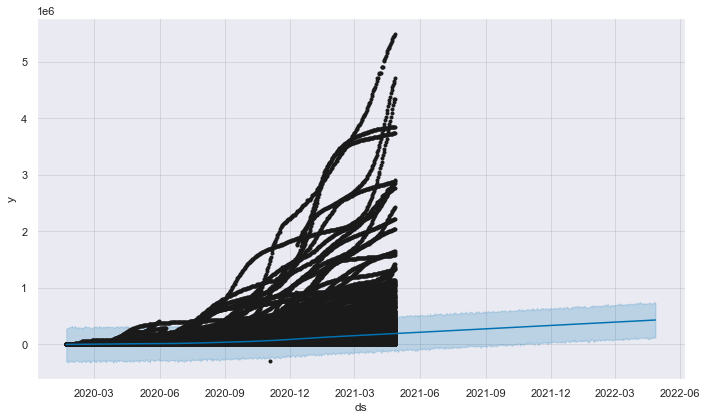

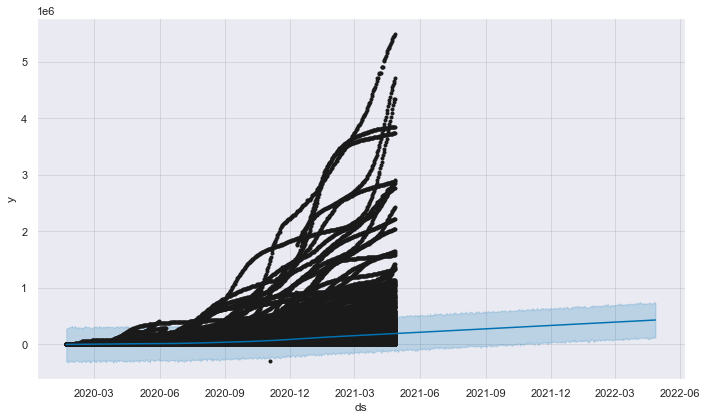

In [43]:
model.plot(prediction)

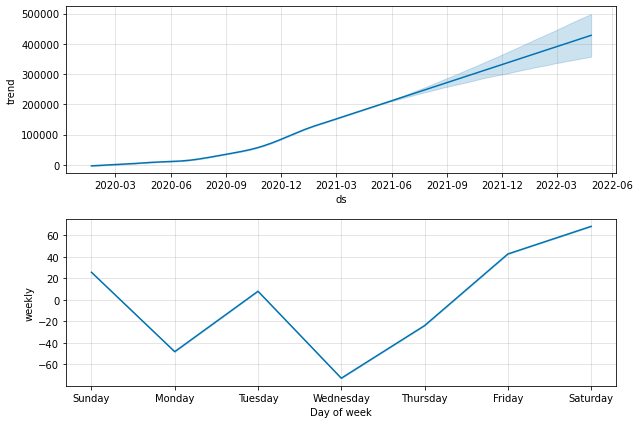

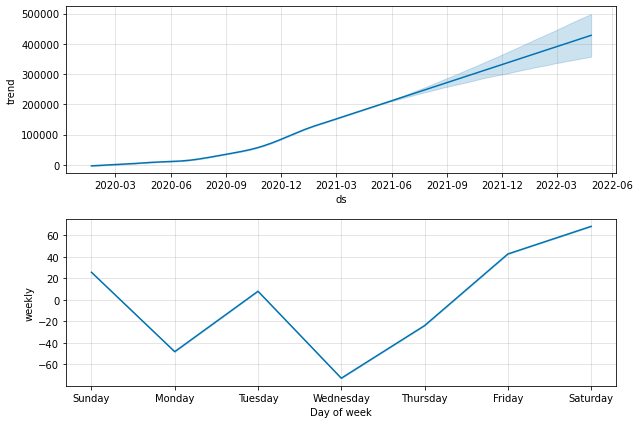

In [32]:
model.plot_components(prediction)

In [55]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='30 days', period='15 days', horizon = '10 days')
df_cv.head()

INFO:fbprophet:Making 29 forecasts with cutoffs between 2020-02-22 00:00:00 and 2021-04-17 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-02-23,1114.35764,-4421.202246,6516.791000,2.0,2020-02-22
1,2020-02-23,1114.35764,-4477.058447,6947.490109,2.0,2020-02-22
2,2020-02-23,1114.35764,-3727.027525,6967.050508,2.0,2020-02-22
3,2020-02-23,1114.35764,-4392.102709,6449.772477,2.0,2020-02-22
4,2020-02-23,1114.35764,-4416.903452,6511.354391,2.0,2020-02-22


In [56]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
187350,2021-04-27,185218.070511,-119446.436514,465568.536462,14836.0,2021-04-17
187351,2021-04-27,185218.070511,-78848.715806,457526.029810,184166.0,2021-04-17
187352,2021-04-27,185218.070511,-129058.900646,489418.310969,221970.0,2021-04-17
187353,2021-04-27,185218.070511,-119092.490940,489452.107444,90346.0,2021-04-17
187354,2021-04-27,185218.070511,-80547.469823,474795.844109,350731.0,2021-04-17


In [57]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,2 days,5.452238e+10,233500.277901,93277.958390,4.360665,0.904876
1,3 days,5.511596e+10,234767.887082,93798.521085,4.294970,0.904374
2,4 days,5.562212e+10,235843.424425,94159.943383,4.278091,0.903941
3,5 days,5.618304e+10,237029.627620,94637.041455,4.239989,0.902742
4,6 days,5.653301e+10,237766.708640,94678.733180,4.282997,0.902983


In [58]:
df_p.head()

,horizon,mse,rmse,mae,mdape,coverage
0,2 days,5.452238e+10,233500.277901,93277.958390,4.360665,0.904876
1,3 days,5.511596e+10,234767.887082,93798.521085,4.294970,0.904374
2,4 days,5.562212e+10,235843.424425,94159.943383,4.278091,0.903941
3,5 days,5.618304e+10,237029.627620,94637.041455,4.239989,0.902742
4,6 days,5.653301e+10,237766.708640,94678.733180,4.282997,0.902983


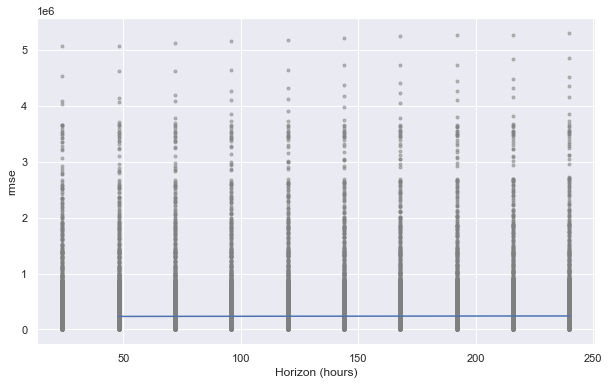

In [60]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

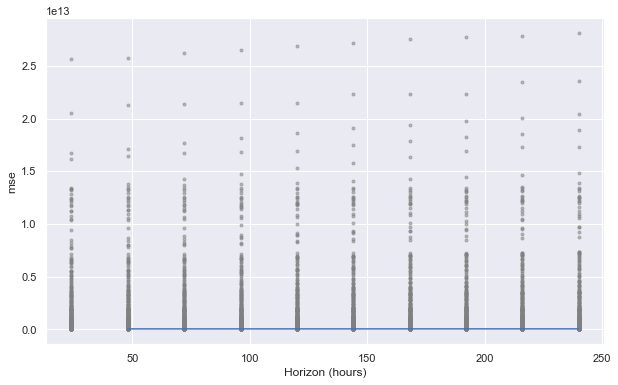

In [61]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

In [62]:
r2_score(df_cv.y, df_cv.yhat)

0.05842905428483969

In [63]:
mean_squared_error(df_cv.y, df_cv.yhat)

56333299301.46887

In [64]:
mean_absolute_error(df_cv.y, df_cv.yhat)

94539.44114809243

In [20]:
import pickle
with open('forecast_model.pckl', 'wb') as fout:
    pickle.dump(model, fout)

In [21]:

 with open('forecast_model.pckl', 'rb') as fin:
        m2 = pickle.load(fin)

In [22]:
from flask import Flask, jsonify, request
from flask_cors import CORS, cross_origin

In [ ]:
app = Flask(__name__)
CORS(app)
@app.route('/api',methods=['POST'])
def predict():
    horizon = int(request.json['horizon'])
    print(request)
    
    future2 = m2.make_future_dataframe(periods=horizon)
    forecast2 = m2.predict(future2)
    
    data = forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-horizon:]
    
    ret = data.to_json(orient='records', date_format='iso')
    
    return ret
    

if __name__ == "__main__":
    app.run(debug=False)
    

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


<Request 'http://localhost:5000/api' [POST]>


INFO:werkzeug:127.0.0.1 - - [28/May/2021 16:40:24] "POST /api HTTP/1.1" 200 -


<Request 'http://localhost:5000/api' [POST]>


INFO:werkzeug:127.0.0.1 - - [28/May/2021 16:43:32] "POST /api HTTP/1.1" 200 -


<Request 'http://localhost:5000/api' [POST]>


INFO:werkzeug:127.0.0.1 - - [28/May/2021 16:47:45] "POST /api HTTP/1.1" 200 -


<Request 'http://localhost:5000/api' [POST]>


INFO:werkzeug:127.0.0.1 - - [28/May/2021 16:47:56] "POST /api HTTP/1.1" 200 -


<Request 'http://localhost:5000/api' [POST]>


INFO:werkzeug:127.0.0.1 - - [28/May/2021 16:48:17] "POST /api HTTP/1.1" 200 -


<Request 'http://localhost:5000/api' [POST]>


INFO:werkzeug:127.0.0.1 - - [28/May/2021 16:48:37] "POST /api HTTP/1.1" 200 -
